# 2023-05-27__synaptic_cond_example

In [1]:
using Units

In [32]:
Δt = 0.01ms
T = 60ms
N = round(Int, T/Δt)

6000

In [33]:
ts = Δt .* (1:N);

In [34]:
function sim(syns = [(Δg = 1nS, spikes = [10ms, 20ms]), ])
    t = 0
    g = 0nS
    τ = 7ms
    gs = []
    syns = deepcopy(syns)
    for i in 1:N
        t += Δt
        for (Δg, spikes) in syns
            if !isempty(spikes) && t ≥ first(spikes)
                popfirst!(spikes)
                g += Δg
            end
        end
        dg =  -g / τ
        g += dg * Δt
        push!(gs, g)
    end
    return gs
end;

In [35]:
using PyPlot

In [36]:
using Revise

In [37]:
using Sciplotlib

In [48]:
using PhDPlots
PhDPlots.set_Δt(Δt);

In [49]:
pl(x) = begin
    fig, ax = plt.subplots(figsize=(2.2, 0.9))
    plotsig(x / nS, nothing, ms; ax);
    G = 1nS
    set(ax, xtype=:range, ytype=:range, ylim=[0, G/nS], xlabel=nothing, xunit="ms", yunit="nS")
end;

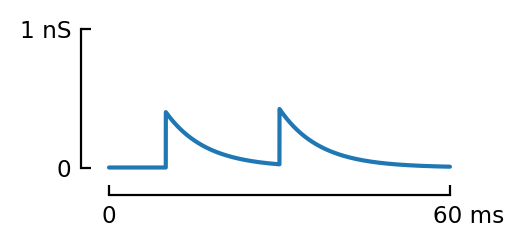

In [58]:
s1 = (0.4nS, [10ms, 30ms])
g1 = sim([s1])
pl(g1);
plt.savefig("../thesis/figs/g2.pdf")

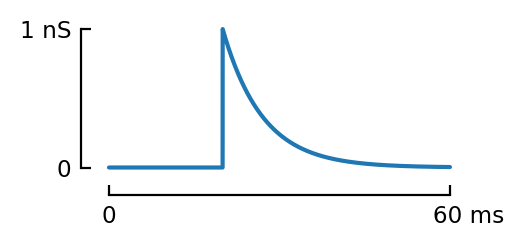

In [59]:
s2 = (1nS, [20ms])
g2 = sim([s2])
pl(g2);
plt.savefig("../thesis/figs/g1.pdf")

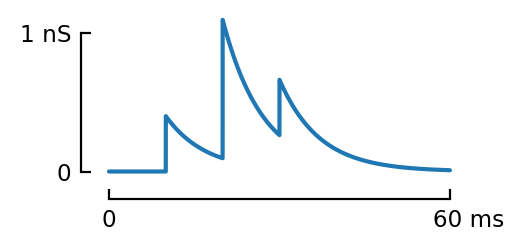

In [60]:
pl(g1 .+ g2);

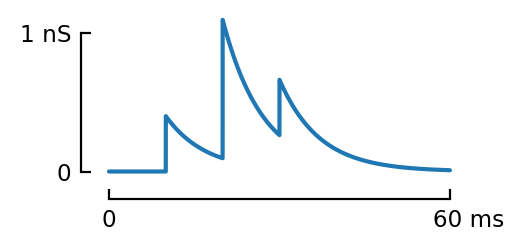

In [53]:
g3 = sim([s1, s2])
pl(g3);
plt.savefig("../thesis/figs/g3.pdf")

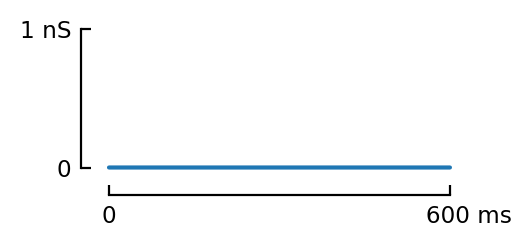

In [44]:
pl(g3 .- (g1 .+ g2));

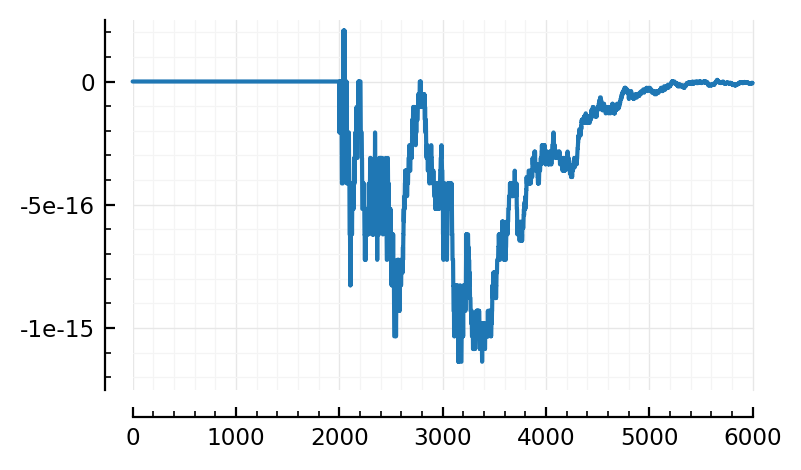

In [45]:
Sciplotlib.plot((g3 .- (g1 .+ g2)) / nS);

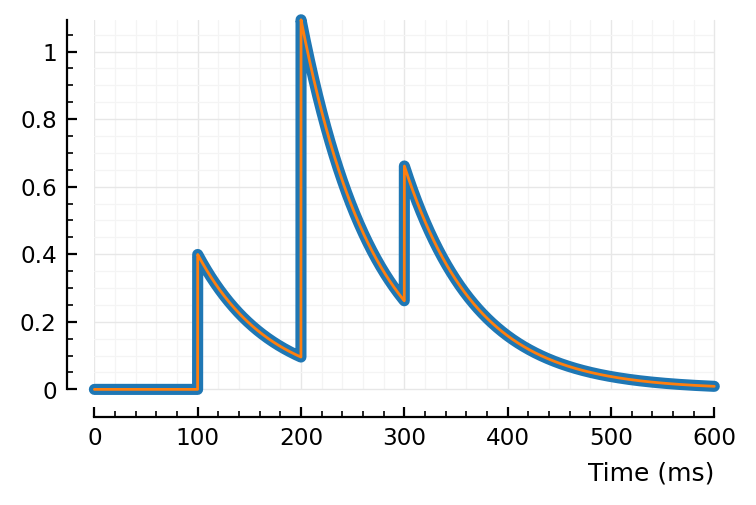

In [46]:
plotsig(g3 / nS, nothing, ms, lw=4)
plotsig((g1 .+ g2) / nS, nothing, ms, lw=1);